#  Accessing specific pixels in single images, or specific images in a stack
This episode uses indexing to display a subregion of the image or to modify the values of specific pixels (in a copy of the raw image, keeping the raw image raw).  Indexing can also be used to generate statistics on pixels by row, by col, or by (col,row) 

In [1]:
%matplotlib inline               
import numpy as np               #import numpy as np, allows us to type "np" instead of "numpy"
import matplotlib.pyplot as plt  #same idea, now we can call matplotlib.pyplot using "plt"
import seaborn as sns            #ditto, enables us to use the seaborn library/package by typing "sns"

In [2]:
from skimage.io import imread    #get the function imread from skimage.io package

In [3]:
imagepath = "../raw/"
imagefile = imagepath+"8bit_im.tif"

In [4]:
data = imread(imagefile)

In [5]:
sns.set_style("dark") # This gets rid of grid line on our image plots!

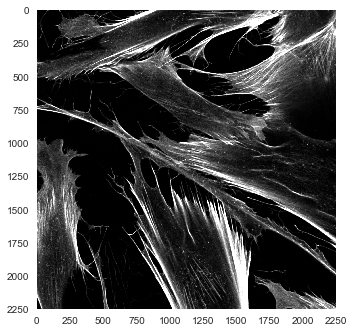

In [6]:
plt.imshow(data, cmap='gray')

In [21]:
data[0,0] #what part of the image will this access? what will this command generate?

11

this is the upper leftmost pixel

In [23]:
data[-1,0]

0

In [33]:
data[0:10,-10:]

array([[ 61,  60,  56,  53,  59,  49,  61,  64,  63,  70],
       [ 49,  53,  48,  62,  51,  60,  55,  62,  73,  89],
       [ 58,  50,  47,  56,  62,  65,  72,  73,  69,  75],
       [ 56,  47,  40,  50,  50,  68,  67,  74, 100, 115],
       [ 42,  51,  53,  61,  71,  59,  73,  88,  99,  85],
       [ 44,  53,  60,  62,  74,  81,  79,  91, 100,  98],
       [ 57,  59,  52,  61,  72,  77,  91,  95,  97, 100],
       [ 50,  52,  59,  70,  78,  81,  95, 104, 115, 114],
       [ 57,  49,  61,  72,  87,  96, 104,  91,  96,  95],
       [ 65,  63,  67,  82,  75,  94, 104, 104,  96, 105]], dtype=uint8)

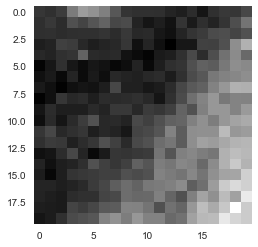

In [37]:
plt.imshow(data[0:20,-20:], cmap = 'gray')

OK, so this is an image instead of an array of numbers (but behind the scenes they are 
                                                       the same things)
But, its very blocky and pixelated.  This is because matplotlib is plotting an object you can see, enlarging each pixel.

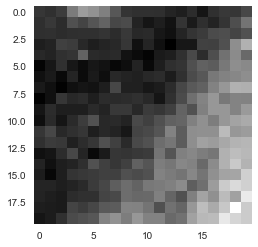

In [36]:
plt.imshow(data[0:20,-20:], cmap = 'gray', interpolation = 'nearest')

Now we want to explore manipulating these data, but remembering to keep raw data raw, 
we will work with a copy

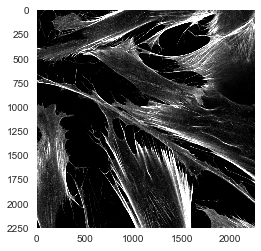

In [38]:
datacopy = data
plt.imshow(datacopy, cmap = 'gray')

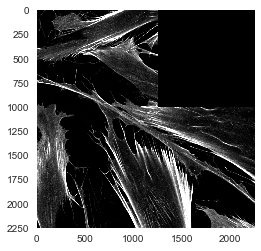

In [45]:
datacopy[:1000, -1000:]=0
plt.imshow(datacopy, cmap = 'gray')

#  Handling more complex images (stacks)

In [7]:
imagefile = imagepath+"organ-of-corti.tif"
img = imread(imagefile)

In [8]:
print(imagefile)

../raw/organ-of-corti.tif


In [9]:
img.shape


(15, 249, 548, 4)

What does this tell us about the image? It isn't (rows, col), right? 
--This file represents a stack of images, in which each image in the stack is a 'slice'
--Each slice is the same shape (rows, col)
--Each slice has mulitple channels

In [10]:
print("The first index {0:d} indicates number of slices in the data set.".format(list(img.shape)[0]))
print("The second index {0:d} indicates number of rows in each slice of image array, thus width of the image".format(list(img.shape)[1]))
print("The second index {0:d} indicates number of columns in each slice of image array, thus height of the image".format(list(img.shape)[2]))
print("The second index {0:d} indicates number of channels in the data set".format(list(img.shape)[3]))

The first index 15 indicates number of slices in the data set.
The second index 249 indicates number of rows in each slice of image array, thus width of the image
The second index 548 indicates number of columns in each slice of image array, thus height of the image
The second index 4 indicates number of channels in the data set


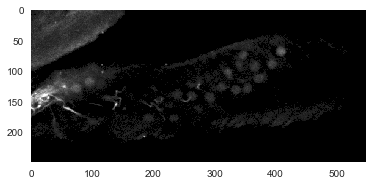

In [59]:
# for example, view slice 12 in channel 3, remember zero-indexing!
slice_num = 13
channel_num = 2
plt.imshow(img[slice_num,:,:,channel_num], cmap = 'gray', interpolation = 'nearest')

# Add code here to compute maximum intensity images for one channel
# Then display all four channels in a 2x2 grid